In [1]:
#add Matplotlib inline magic command
%matplotlib inline

#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"





In [3]:
#Read the city files
city_data_df = pd.read_csv(city_data_to_load)
# city_data_df.head(10)

In [4]:
#read the city files
ride_data_df = pd.read_csv(ride_data_to_load)
# ride_data_df.head(10)


# 5.2.4 Explore the data in Pandas

## Explore City Data

In [5]:
#Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#makesure there are no nulls
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# how many data points for each type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get the number of data points from the urban city
print(sum(city_data_df["type"] =="Urban"))
print(sum(city_data_df["type"] =="Rural"))
print(sum(city_data_df["type"] =="Suburban"))

66
18
36


## Explore the Ride Data

In [10]:
#count the non-null rows
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
#see if there are any null-values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
#Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge the Two Data Sets

In [13]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, 
                         how='left', 
                         on=['city', 'city'])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


# 5.3.1 pick up

In [14]:
#Create the urbn city dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] =="Urban"]
# urban_cities_df.head()


In [15]:
#Creat suburban and rural cities dataFrames
suburban_cities_df = pyber_data_df[pyber_data_df["type"] =="Suburban"]
# suburban_cities_df.head()

In [16]:
#Creat suburban and rural cities dataFrames
rural_cities_df = pyber_data_df[pyber_data_df["type"] =="Rural"]
# rural_cities_df.head()

# 5.3.2: get the number of rides for each city type

In [17]:
#5.3.2: get the number of rides for each city type
#Get the number of riders for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()['ride_id']
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


# 5.3.3 get the average fare for each city type

In [18]:
#get the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# 5.3.4 get the average number of drivers for each city type

In [19]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


# 5.3.5 Create bubble charts

In [20]:
# #build the scatter plot for urban cities
# # Build the scatter plots for urban cities.
# plt.scatter(urban_ride_count,
#       urban_avg_fare,
#       s=(urban_driver_count*10),
#       c='coral',
#       edgecolor='k', label='Urban',
#       alpha=0.8, linewidths=1)
# plt.title("Pyber Ride-Sharing Data (2019)")
# plt.ylabel("Average Fare ($)")
# plt.xlabel("Total Number of Rides (per City)")
# plt.grid(True)

# #add the legend
# plt.legend()

In [21]:
# # Build the scatter plots for suburban cities.
# plt.scatter(suburban_ride_count,
#       suburban_avg_fare,
#       s=10*suburban_driver_count, c="skyblue",
#       edgecolor="black", linewidths=1,
#       alpha=0.8, label="Suburban")
# plt.title("PyBer Ride-Sharing Data (2019)")
# plt.ylabel("Average Fare ($)")
# plt.xlabel("Total Number of Rides (Per City)")
# plt.grid(True)
# # Add the legend.
# plt.legend()

In [22]:
# # Build the scatter plots for rural cities.
# plt.scatter(rural_ride_count,
#       rural_avg_fare,
#       s=10*rural_driver_count, c="gold",
#       edgecolor="black", linewidths=1,
#       alpha=0.8, label="Rural")
# plt.title("PyBer Ride-Sharing Data (2019)")
# plt.ylabel("Average Fare ($)")
# plt.xlabel("Total Number of Rides (Per City)")
# plt.grid(True)
# # Add the legend.
# plt.legend()

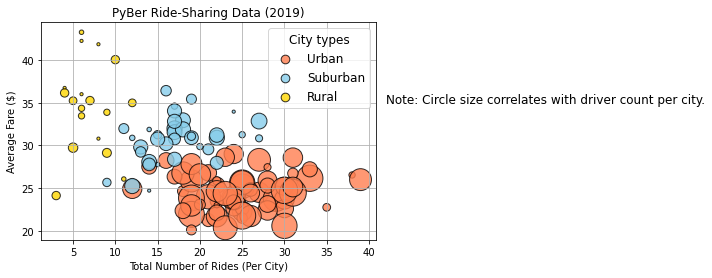

In [23]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize='12',mode="Expanded",
                 scatterpoints=1,loc='best', title="City types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("resources/Fig1.png")

# Show the plot
plt.show()

# 5.4.1 Summary Statistics for Number of Rides by City Type

In [ ]:
#Use the df.describe() method to get summary stats
#urban_cities_df.describe()

In [35]:
# urban_ride_count.describe()

In [33]:
# suburban_ride_count.describe()

In [34]:
# rural_ride_count.describe()

### Pandas mean, median, mode methods


In [36]:
#Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [37]:
#Calculate the median of the ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [39]:
#Calculate the mode of the ride count for urban cities
suburban_ride_count.mode()

0    17
dtype: int64

### NumPy mean, median functions, SciPy mode

In [40]:
#Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [53]:
#Calculate the measures of central tendency for the ride count fo the urban areas

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean ride count for the urban cities is {mean_urban_ride_count:.2f} ")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_suburban_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean ride count for the urban cities is 24.62 
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


# 5.4.2 Summary stats for the Fare by City Type

In [64]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [59]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [65]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [66]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


# 5.4.3 Summary Stats by Number of Drivers by City Type


In [81]:
#Get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [82]:
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers per city is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers per city is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers per city is {mode_urban_drivers}.")

The mean number of drivers per city is 36.68.
The median number of drivers per city is 37.00.
The mode number of drivers per city is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [83]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers per suburban city is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers per suburban city is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers per suburban city is {mode_suburban_drivers}.")

The mean number of drivers per suburban city is 13.71.
The median number of drivers per suburban city is 16.00.
The mode number of drivers per suburban city is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [86]:
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers per rural city is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers per rural city is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers per rural city is {mode_rural_drivers}.")

The mean number of drivers per rural city is 4.30.
The median number of drivers per rural city is 4.00.
The mode number of drivers per rural city is ModeResult(mode=array([1], dtype=int64), count=array([32])).


# 5.4.4 Box & Whisker plots

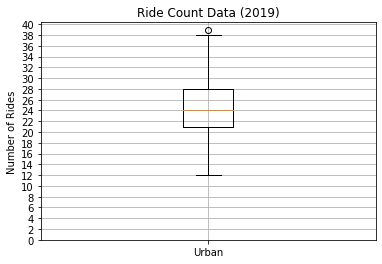

In [93]:
# create a box and whisker plot for urbn city ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#add the title, y-axis, grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,41,step=2.0))
ax.grid()
plt.show()

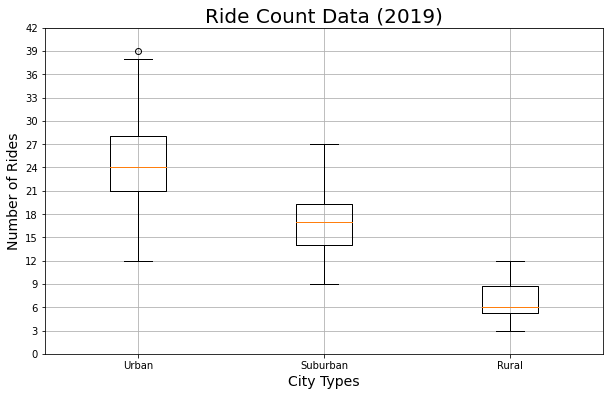

In [95]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig2.png")
plt.show()

In [96]:
# Get the city that matches 39, the outlier in the urban city ride count data
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


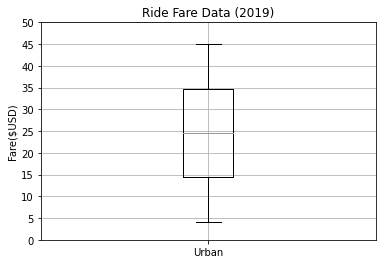

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [100]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

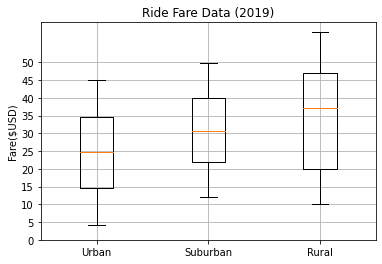

<Figure size 432x288 with 0 Axes>

In [113]:
# Create a box-and-whisker plot for all city types fare data.
x_labels = ["Urban", 'Suburban', 'Rural']
city_fares = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(city_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

#save figure
plt.savefig('Resources/Fig3.png')

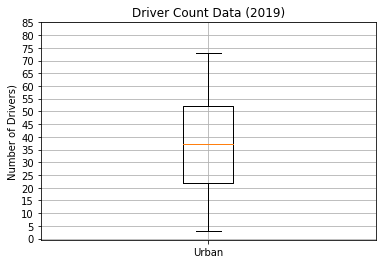

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [102]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

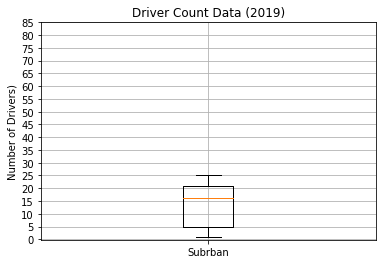

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [103]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

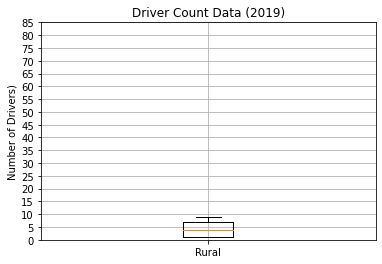

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [104]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

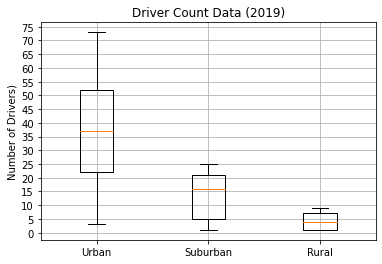

<Figure size 432x288 with 0 Axes>

In [114]:
#Create a 3 part box % Whisker plot for driver count

x_labels = ["Urban", 'Suburban', 'Rural']
city_drivers=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(city_drivers, labels=x_labels)
ax.grid()
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 80, step=5.0))

plt.show()

#save figure
plt.savefig("resources/Fig4.png")

# 5.5.1 Get the Percentage of Fares for Each City Type

In [116]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [117]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [118]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64


# 5.2.2 Pie Chart for the Percentage of Fares by City Type

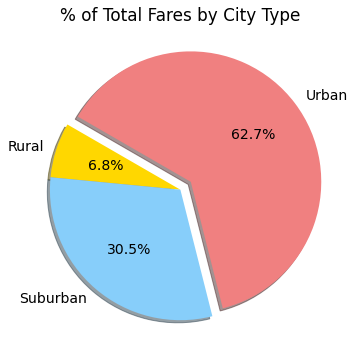

In [131]:
#Build the percentage of fares by city type pie chart

#import mpl to change the plot config using rcParams
import matplotlib as mpl

#build pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("% of Total Fares by City Type")

#hange the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

#save figure
plt.savefig('resources/fig5.png')
plt.show()

# 5.6.1 calculate ride percentages

In [138]:
#get the total rides by city type
ride_percents = 100 *pyber_data_df.groupby(["type"]).count()['ride_id'] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

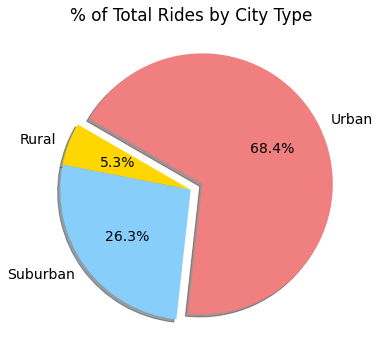

In [140]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("resources/Fig6.png")
# Show Figure
plt.show()